# Dataset Description

This dataset collects informaton from 100k
medical appointments is focused on the
queston of whether or not patents show up
for their appointment. The main qeuston we
are trying to answer here is why 30% of
patents miss their scheduled appointment.
We are trying to predict the most important
factors that affect the atendance of the
patent

# Columns Description

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data=pd.read_csv('KaggleV2-May-2016.csv')

# Data Wrangling

In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.shape

(110527, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
data.duplicated().sum()

0

In [7]:
data.describe() # summary statistic

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
data.nunique() 

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
data.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
data.Age.value_counts() 

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [11]:
data=data[data['Age']>=0] 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [13]:
# تغيير  ScheduledDay  and AppointmentDay to datetime
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')


In [14]:
data.info() # معلومات عن الداتا فريم من جديد

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  float64       
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  object        
 7   Scholarship     110526 non-null  int64         
 8   Hipertension    110526 non-null  int64         
 9   Diabetes        110526 non-null  int64         
 10  Alcoholism      110526 non-null  int64         
 11  Handcap         110526 non-null  int64         
 12  SMS_received    110526 non-null  int64         
 13  No-show         110526 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

# "Exploring data in columns more deeply"

In [15]:
data['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [16]:
data['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [17]:
data['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [18]:
data['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

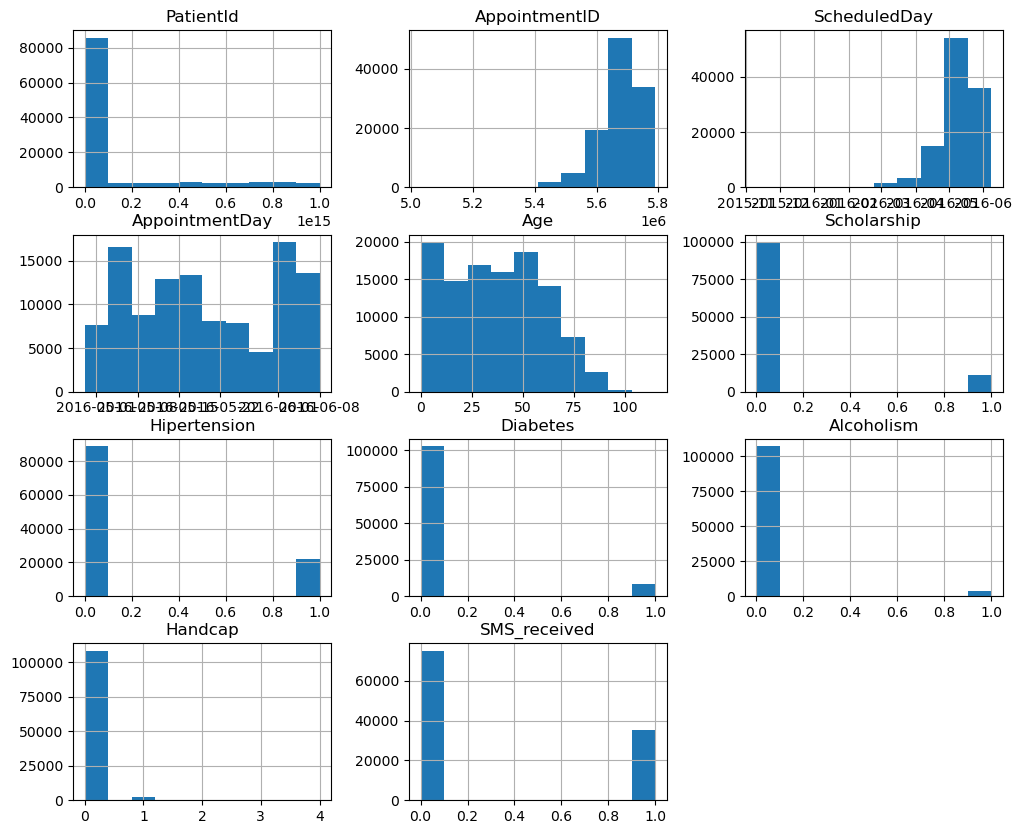

In [19]:
data.hist(figsize=(12,10)); #histogram


In [20]:
# حذفنا هذا العمود لان اغلب القيم الي فيه تساوي صفر 

data['Handcap']=data['Handcap'][data['Handcap']<=1]

In [21]:
# تغيير اسم العمود No-show   الى  absent

data=data.rename(columns={'No-show':'Absent'})
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Absent'],
      dtype='object')

In [22]:
data['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

# Does the patent gender has a realaton with the atendance?

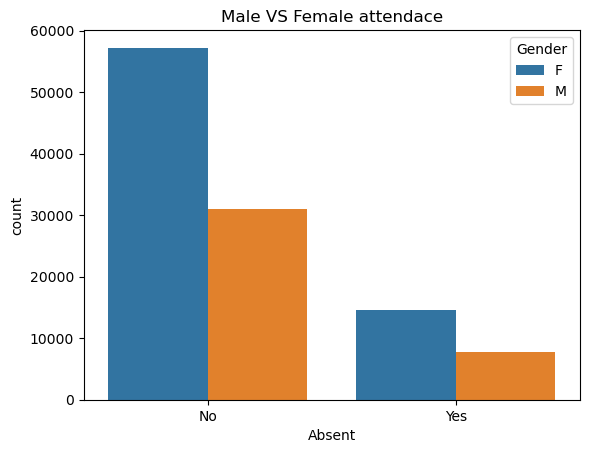

In [23]:
sns.countplot(x=data['Absent'], hue=data['Gender']);
plt.title('Male VS Female attendace');

# Does the neighborhood play a role in making patents don't show up? "Locaton of the "hospital

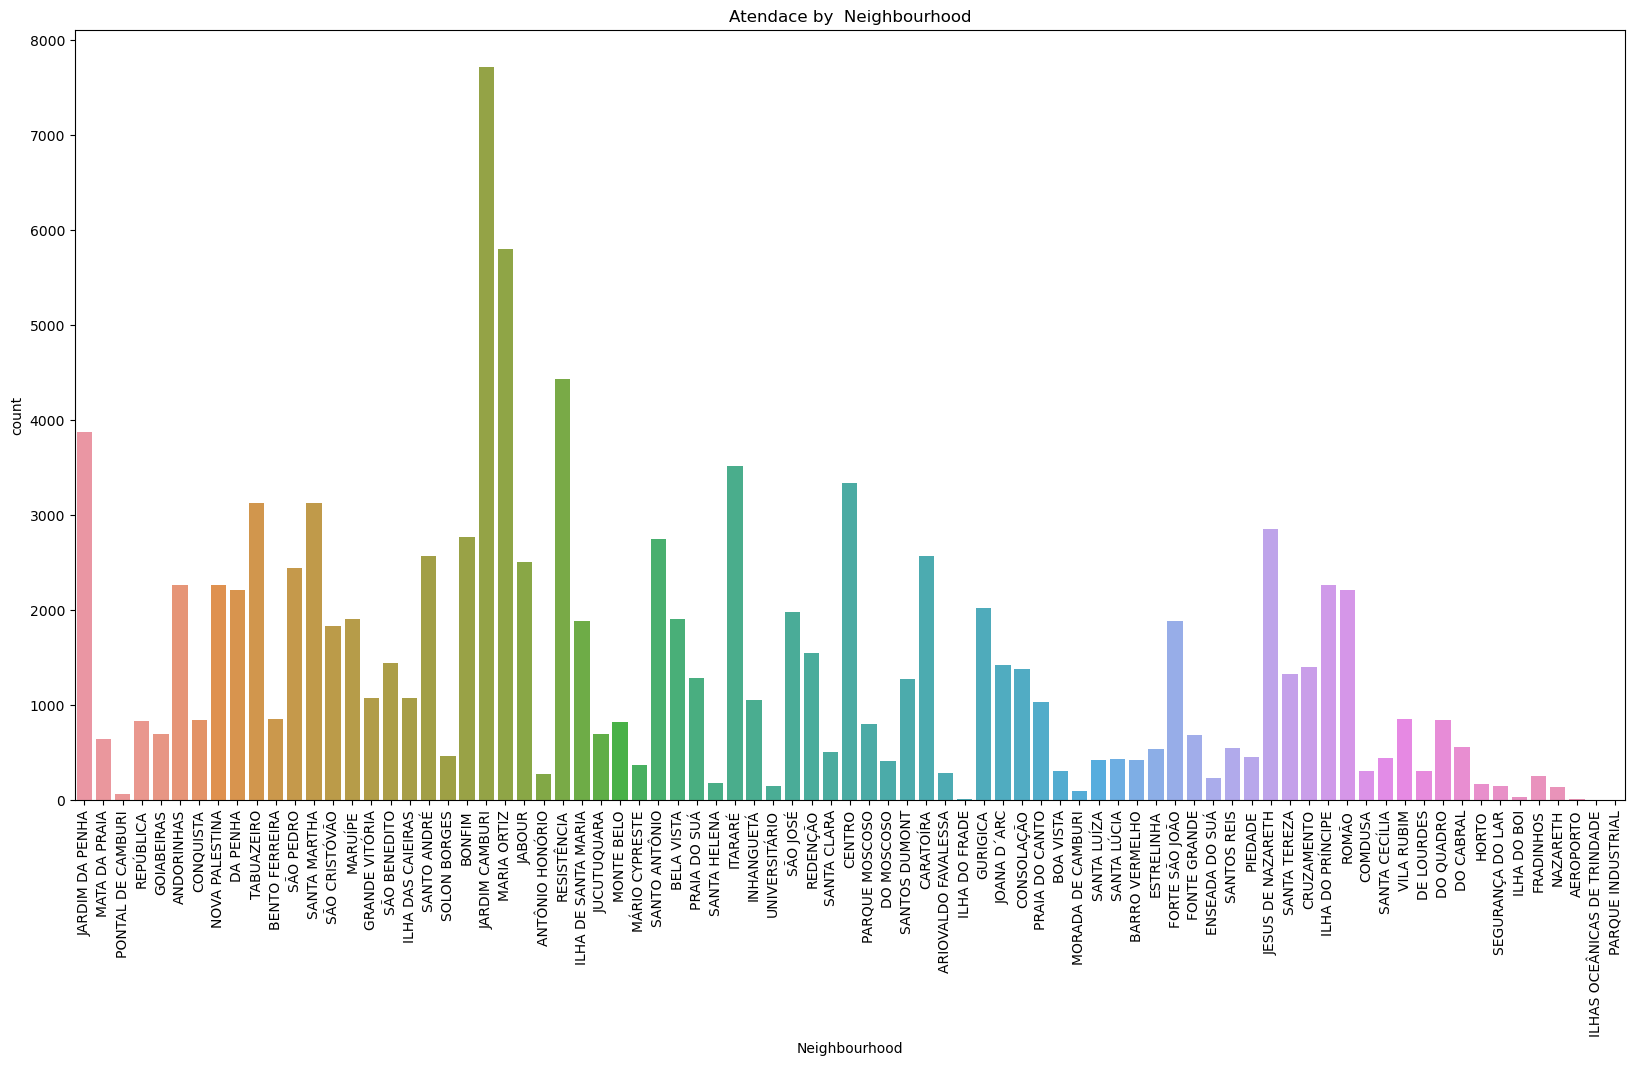

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x=data.Neighbourhood);
plt.title('Atendace by  Neighbourhood')
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Atendace by  Neighbourhood')

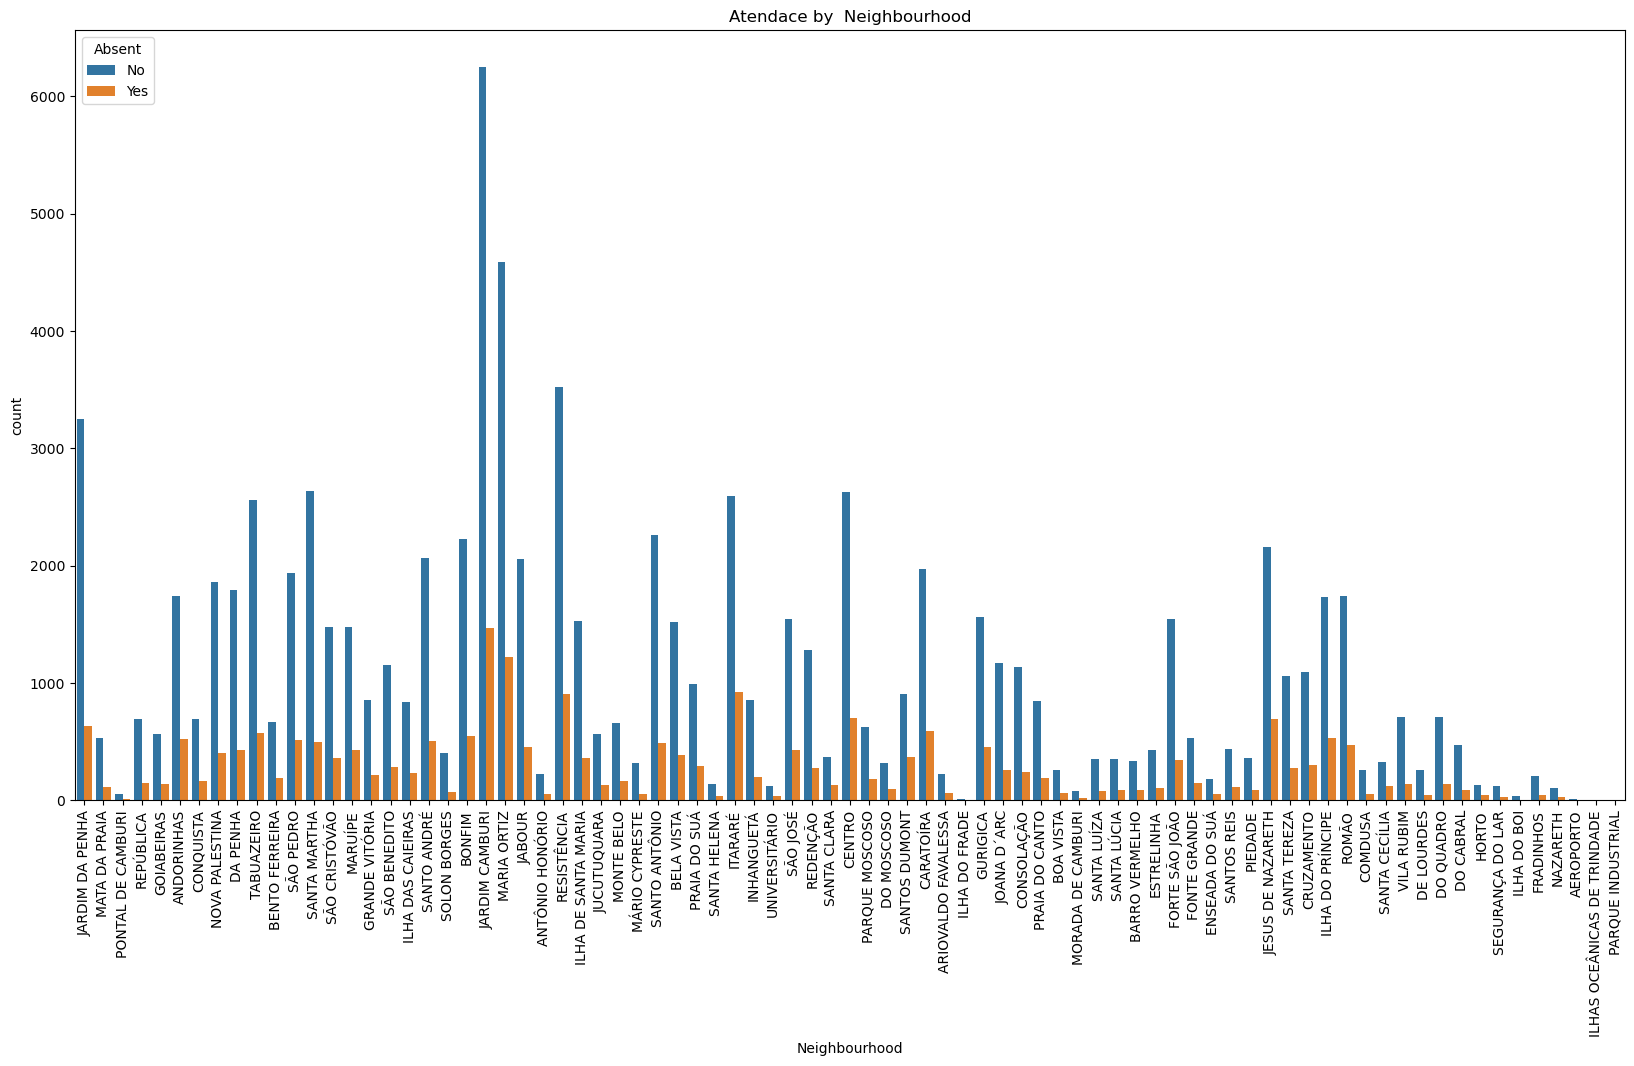

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['Neighbourhood'],hue=data['Absent']);
plt.xticks(rotation=90);
plt.title('Atendace by  Neighbourhood')


# Which pateints show up more? Does old age take care of their health more than youth?

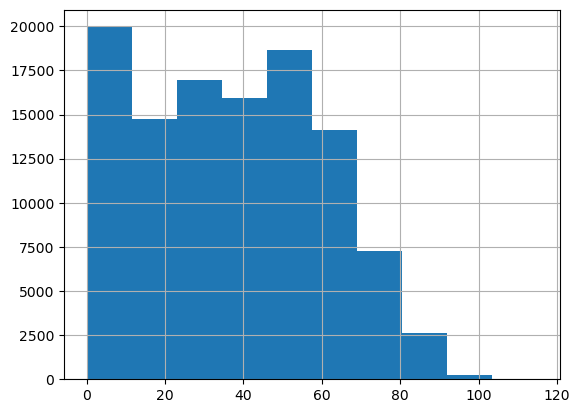

In [26]:
data['Age'].hist(bins=10);

In [27]:
data['Age']=[round(a,-1) for a in data['Age']]
data['Age'].value_counts()

40     15960
60     15628
20     15342
50     14012
30     13026
0      11731
10     11526
70      7365
80      4776
90      1090
100       65
120        5
Name: Age, dtype: int64

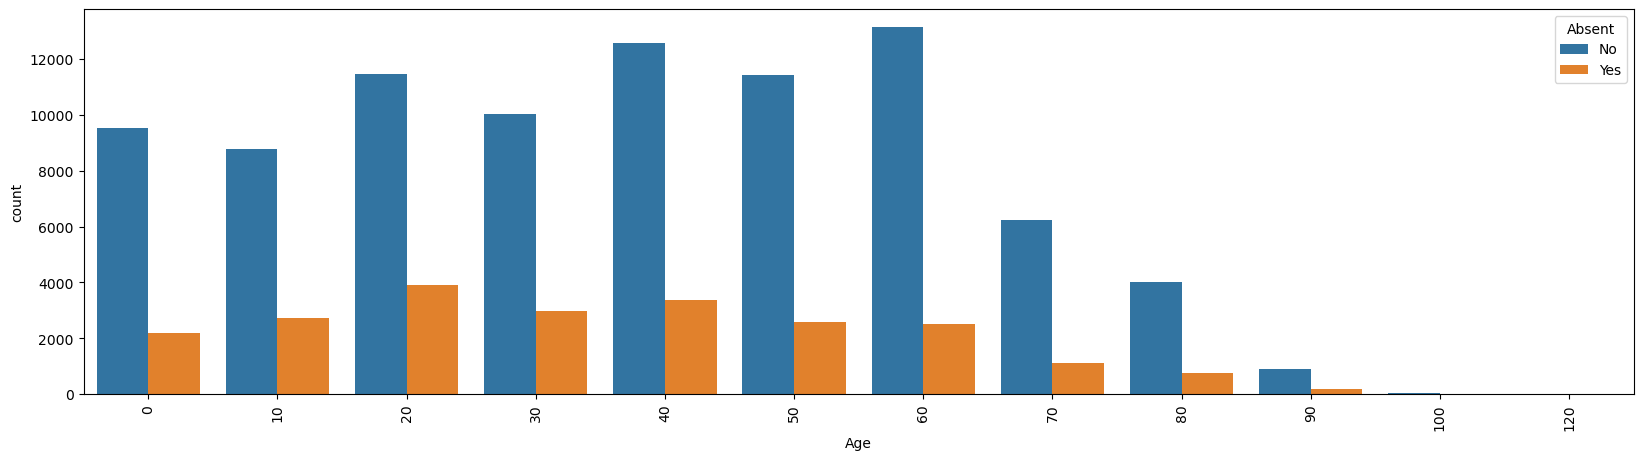

In [28]:
plt.figure(figsize=(20,5))
sns.countplot(x=data['Age'], hue=data['Absent'])
plt.xticks(rotation=90);

# Does the disease type affect the patent's . show up?

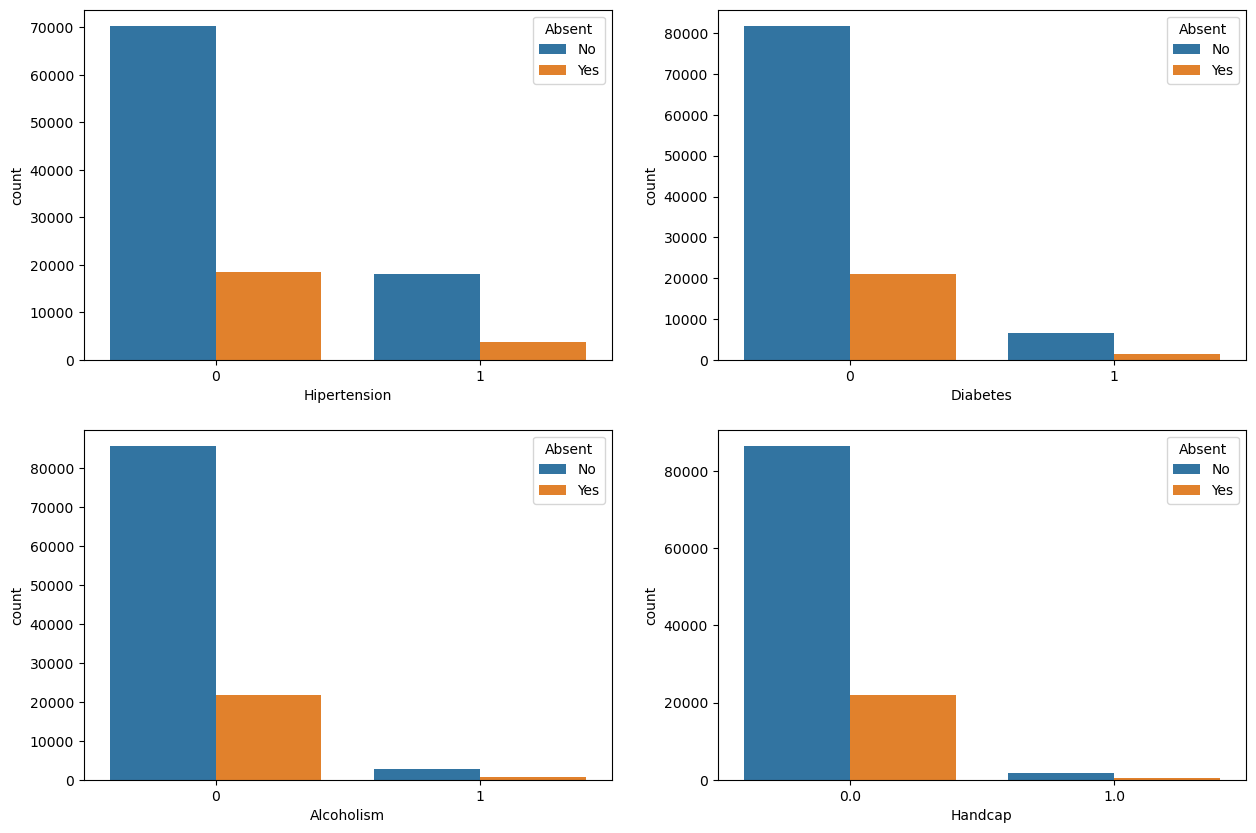

In [29]:
# plotting deseases against no show
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x = 'Hipertension', data = data, hue= 'Absent')

plt.subplot(2,2,2)
sns.countplot(x = 'Diabetes', data = data, hue= 'Absent')

plt.subplot(2,2,3)
sns.countplot(x = 'Alcoholism', data = data, hue= 'Absent')

plt.subplot(2,2,4)
sns.countplot(x = 'Handcap', data = data, hue= 'Absent')

plt.show()

# Conclusion

Based on the data, we can infer that age factor significantly affects attendance, especially for individuals aged between 65 and 100. They require special care. Regarding gender, there is no significant impact. However, the proximity factor has a significant influence. Therefore, we suggest providing clinics near the population. As for the health condition factor, individuals with Hipertension have a higher attendance rate compared to others.